<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())



# For the "Median value of owner-occupied homes" provide a boxplot.

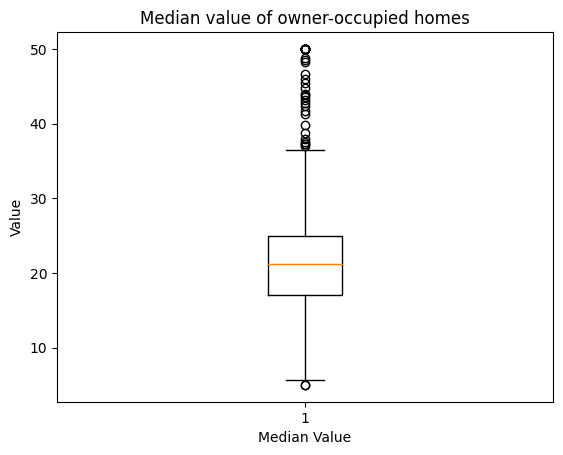

In [6]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Median value of owner-occupied homes')
pyplot.xlabel('Median Value')
pyplot.ylabel('Value')
pyplot.show()

# Provide a bar plot for the Charles river variable

In [ ]:
boston_df['CHAS'].value_counts()

<AxesSubplot:xlabel='CHAS'>

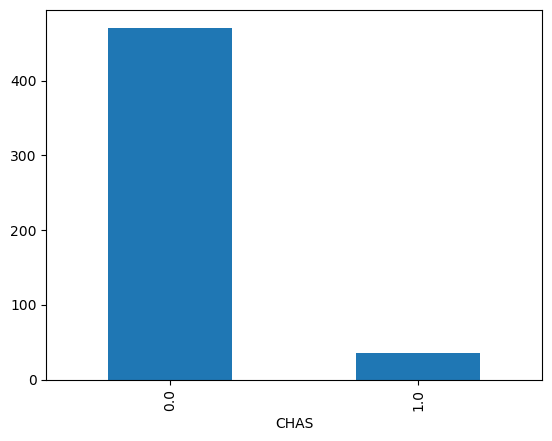

In [5]:
boston_df['CHAS'].value_counts().plot(kind='bar')

# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [9]:
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] =  '35 years and younger'
boston_df.loc[boston_df['AGE'].between(35, 70), 'age_group'] =  'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'age_group'] = '70 years and older'
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

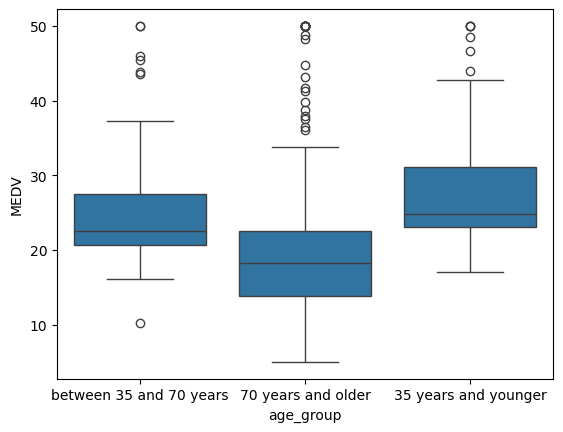

In [10]:
sns.boxplot(x = boston_df['age_group'], y = boston_df['MEDV'])

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

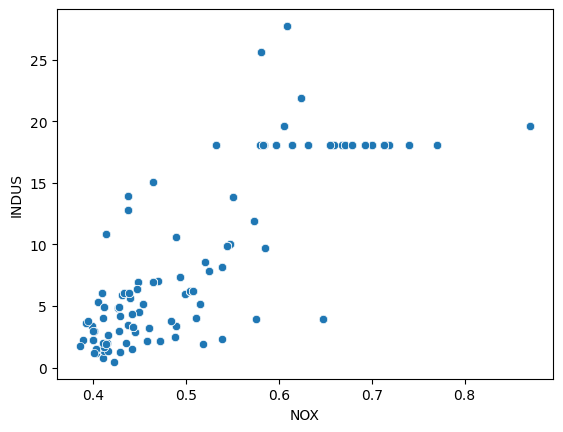

In [11]:
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])

Relationship b/w NOX and INDUS: as per the graph, we can observe a linear relationship between NOX & INDUS variable till the value of NOX = 0.6.

# Create a histogram for the pupil to teacher ratio variable

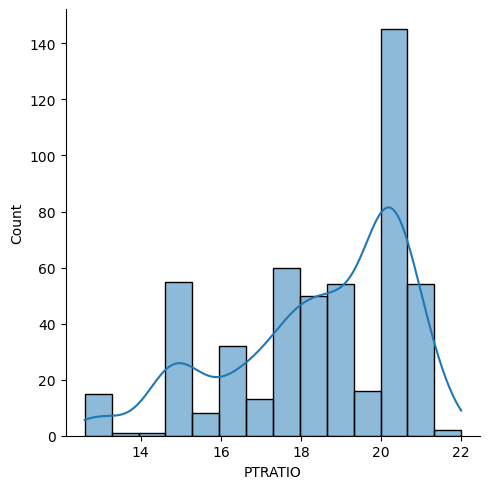

In [12]:
sns.displot(data = boston_df['PTRATIO'], kde=True)

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [13]:
# null hypothesis h0 > there is no significant difference.
# alternative hypothesis h1 > there is significant differences.
# alpha value = 0.05

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var= True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

as the p-value = 0.00007390, lesser than the alpha value of 0.05 reject the null hypothesis that there is no
significant difference in the values.

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [14]:
# null hypothesis h0 > there is no difference in mean for each proportion 
# alternative hypothesis h1 > there is at least one group's mean different.

# ONE- WAY ANOVA TEST ( for comparing means of more than two groups)

low = boston_df[boston_df['age_group'] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df['age_group'] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df['age_group'] == '70 years and older']["MEDV"]
scipy.stats.f_oneway(low, mid, high)



F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

## Result 
since the p- value is  0.0000000000000017105011022702984 which is less than the alpha value of 0.05, so we reject the 
null hypothesis that there is no difference and hence conclude that at least one of these means are significantly different.

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [15]:
# null hypothesis h0 > no relationship between NOX and INDUS.
# alternative hypothesis h1 >  relationship between NOX and INDUS.

# PEARSON CORRELATION TEST
scipy.stats.pearsonr(x = boston_df['NOX'], y = boston_df['INDUS'])

# since the p-value is less than alpha value of 0.05, we reject the null hypothesis and conclude that there is a relationship between NOX and INDUS.


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#Result
since p-value < 0.05, we reject the null hypothesis that their is no correlation between NOX and INDUS and conclude that there is a relationship between these two.

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [16]:
# null hypothesis h0> no impact of change in DIS value on MEDV value.
# alternate hypothesis h1 > there is an impact of changed DIS on the median price MEDV..

# Rgression analysis to find out the linear regression between DIS and MEDV

y = boston_df['MEDV']
x = boston_df['DIS']

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        14:06:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# Result: 
as from the summary the Pearson Coefficient has the value of 0.24899 which shows a weak correaltion between DIS and Median Value variable MEDV.